In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [7]:
df = pd.read_csv('../../data/handlebar/processed_segments_overlap_50.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1.0,-1.575378,5.295975,5.295975,16.682800,19.517532,14.781799,14.609421,7.469910,11.252747,...,-6.689407,2.274490,4.649536,-18.933350,-24.708160,-21.212631,-3.002335,10.764328,19.019547,19.871872
9313,1.0,0.100555,-6.871353,3.026276,17.348389,15.734695,13.632584,13.632584,14.556747,12.014099,...,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,53.400284
9314,1.0,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955,-0.574615,...,4.922485,19.182343,20.283676,20.283676,12.129028,-3.567368,-3.567368,1.077393,9.370911,10.749970
9315,1.0,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,...,0.210693,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890,19.072205,19.072205


In [8]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [9]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [10]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [11]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   10,
       ...
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863],
      dtype='int64', length=1796)
Index([   7,   54,   63,   73,   92,   94,  119,  188,  204,  209,  218,  330,
        358,  363,  402,  412,  421,  456,  530,  553,  567,  584,  590,  597,
        757,  784,  796,  840,  891,  894,  949,  950,  955,  962,  978,  979,
        990, 1006, 1033, 1038, 1071, 1126, 1135, 1143, 1168, 1195, 1266, 1272,
       1274, 1275, 1279, 1359, 1384, 1399, 1409, 1442, 1462, 1472, 1520, 1521,
       1562, 1581, 1598, 1624, 1628, 1655, 1673, 1763],
      dtype='int64')


In [12]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [13]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2), 
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [14]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [15]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=128,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4608 - val_loss: 0.3880
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3766 - val_loss: 0.3529
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3549 - val_loss: 0.3349
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3336 - val_loss: 0.3222
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3204 - val_loss: 0.3129
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3123 - val_loss: 0.3053
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3072 - val_loss: 0.2990
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2977 - val_loss: 0.2934
Epoch 9/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2896 - val_loss: 0.2883
Epoch 10/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2815 - val_loss: 0.2841
Epoch 11/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2895 - val_loss: 0.2800
Epoch 12/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2

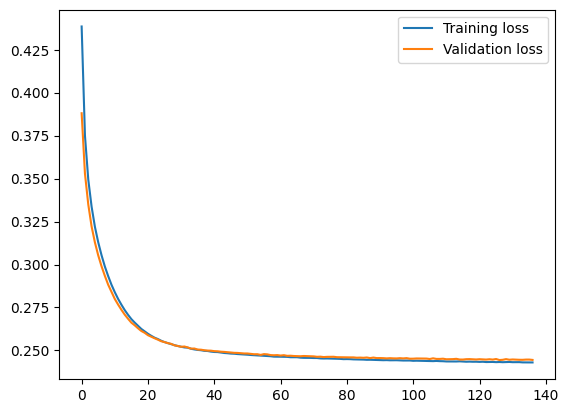

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

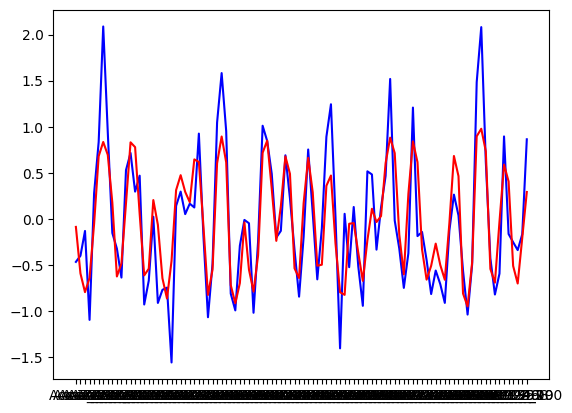

In [17]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[0], 'blue')
plt.plot(decoder_out[0], 'red')

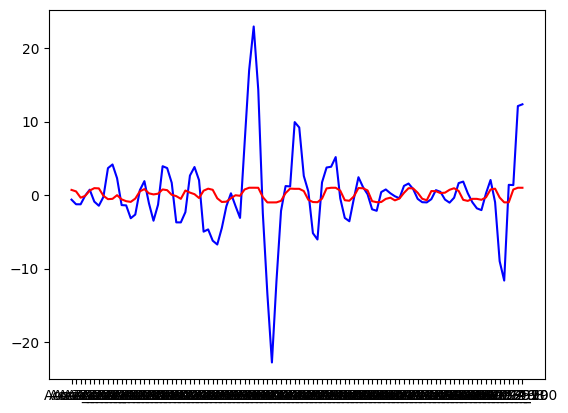

In [18]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(array([471.,  40.,  21.,  13.,   7.,   6.,   9.,  26.,  53.,  88., 101.,
        109.,  98., 107.,  98.,  72.,  84.,  71.,  54.,  46.,  46.,  20.,
         34.,  19.,  13.,  15.,  19.,   8.,   8.,   4.,   5.,   6.,   1.,
          4.,   3.,   4.,   3.,   1.,   2.,   0.,   1.,   0.,   1.,   1.,
          0.,   1.,   2.,   0.,   0.,   1.]),
 array([0.00197103, 0.02458914, 0.04720724, 0.06982535, 0.09244346,
        0.11506157, 0.13767967, 0.16029777, 0.18291588, 0.205534  ,
        0.2281521 , 0.25077021, 0.27338833, 0.29600644, 0.31862453,
        0.34124264, 0.36386076, 0.38647887, 0.40909699, 0.43171507,
        0.45433319, 0.4769513 , 0.49956939, 0.52218747, 0.54480559,
        0.5674237 , 0.59004182, 0.61265993, 0.63527799, 0.6578961 ,
        0.68051422, 0.70313233, 0.72575045, 0.74836856, 0.77098668,
        0.79360479, 0.81622291, 0.83884096, 0.86145908, 0.88407719,
        0.90669531, 0.92931342, 0.95193154, 0.97454965, 0.99716771,
        1.01978588, 1.04240394, 1.06502211, 1.

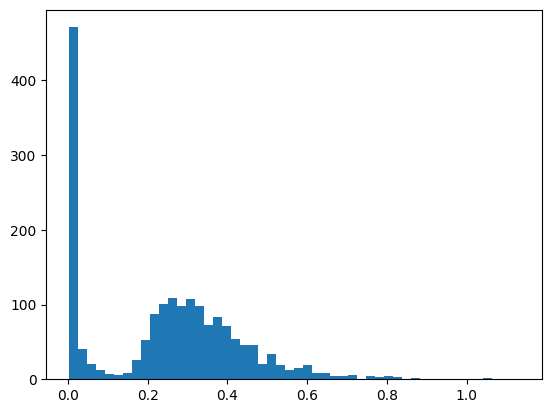

In [19]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 3., 1., 1., 1., 4., 0.,
        1., 2., 2., 5., 3., 2., 4., 1., 0., 3., 0., 3., 3., 4., 3., 1., 2.,
        3., 0., 0., 3., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.]),
 array([0.51714766, 0.57905996, 0.64097226, 0.70288455, 0.76479679,
        0.82670909, 0.88862139, 0.95053363, 1.01244593, 1.07435822,
        1.13627052, 1.19818282, 1.26009512, 1.32200742, 1.38391972,
        1.44583201, 1.50774431, 1.56965649, 1.63156879, 1.69348109,
        1.75539339, 1.81730568, 1.87921798, 1.94113028, 2.0030427 ,
        2.06495476, 2.12686729, 2.18877935, 2.25069165, 2.31260395,
        2.37451625, 2.43642855, 2.49834085, 2.56025314, 2.6221652 ,
        2.68407774, 2.7459898 , 2.80790234, 2.8698144 , 2.93172693,
        2.99363899, 3.05555153, 3.11746359, 3.17937613, 3.24128819,
        3.30320072, 3.36511278, 3.42702532, 3.48893738, 3.55084991,
        3.61276221]),
 <BarContainer object of 50 artists>)

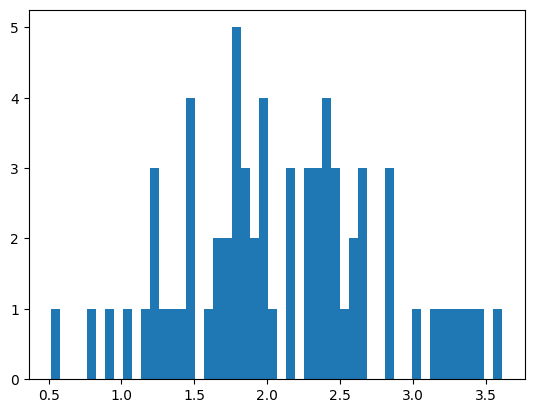

In [20]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [21]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.7316388)

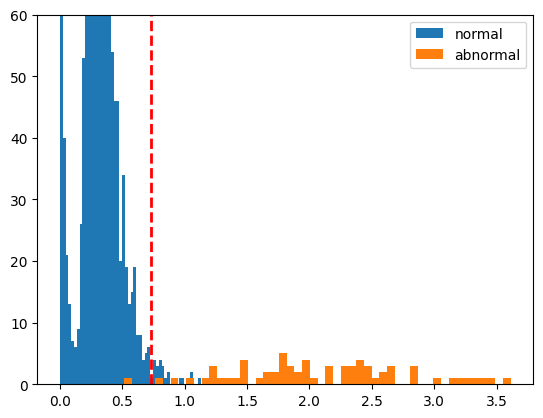

In [22]:

plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [23]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1771
Accuracy:  0.9860801781737194
False Predictions index:  [73, 379, 620, 669, 725, 766, 771, 781, 790, 805, 848, 1122, 1349, 1397, 1423, 1431, 1441, 1447, 1498, 1540, 1619, 1670, 1688, 1693, 1759]


In [24]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  67
Accuracy:  0.9852941176470589


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


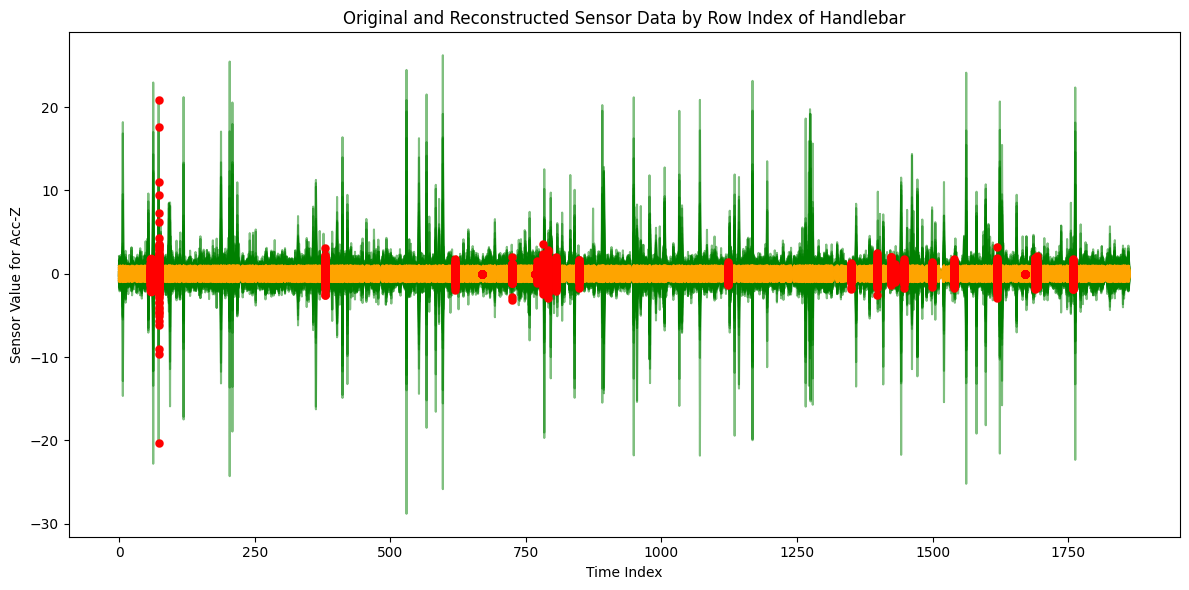

In [26]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :] 
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()